In [ ]:
#import the dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
# import and read in the cardio_train csv file
import pandas as pd
df_cardio = pd.read_csv("./Resources/cardio_train.csv", sep = ';')
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Determine the number of unique values in each column.
for x in df_cardio.columns:
  print(x, len(df_cardio[x].unique()))

id 70000
age 8076
gender 2
height 109
weight 287
ap_hi 153
ap_lo 157
cholesterol 3
gluc 3
smoke 2
alco 2
active 2
cardio 2


In [ ]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df_cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df_cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# convert age to years to display graph
df_cardio['age'] = (df_cardio['age']/365).round().astype('int')

<Axes: xlabel='age', ylabel='count'>

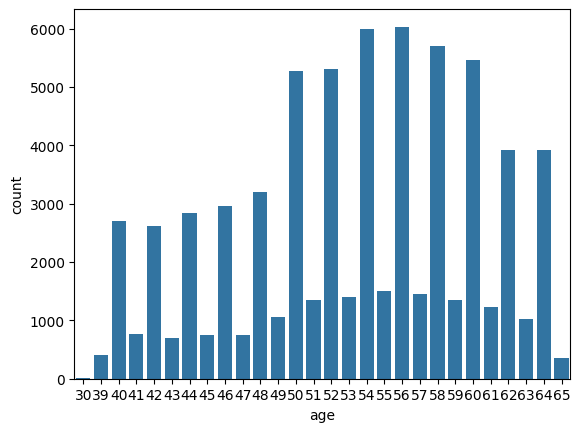

In [ ]:
# graph the distribution of age in the data

sns.countplot(x='age', data=df_cardio)

<Axes: xlabel='cardio'>

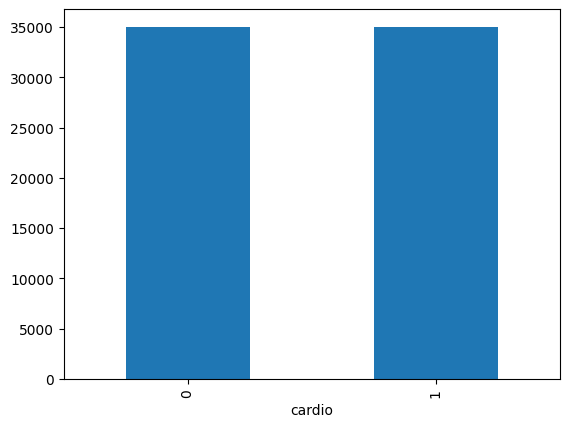

In [ ]:
# graph the  distribution of patients who are affected by cardiovascular disease
df_cardio["cardio"].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='count'>

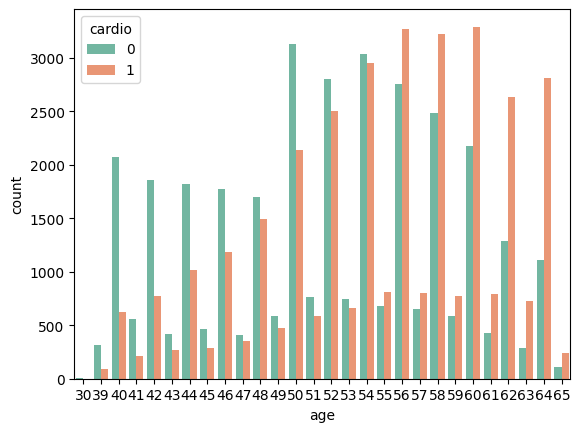

In [ ]:
# compare count of patients with affected by cardiovascualr disease or not by age
sns.countplot(x='age', hue= 'cardio', data=df_cardio, palette="Set2")

In [ ]:
# Compute logistic regression to predict cardio disease

X = df_cardio.drop(columns= ['cardio'])
y = df_cardio

# Splittig train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Begin to Complile, Train, and Evaluate the model

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train_scaled.shape[1]
hidden_nodes1 =80
hidden_nodes2=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes2, activation='relu'))

# Output layer with 13 units
nn.add(tf.keras.layers.Dense(units=13, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                1040      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 13)                403       
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
1488/1488 [==============================] - 4s 2ms/step - loss: -58341172.0000 - accuracy: 0.9822 - val_loss: -227561296.0000 - val_accuracy: 0.9987
Epoch 2/100
1488/1488 [==============================] - 3s 2ms/step - loss: -720166080.0000 - accuracy: 0.9980 - val_loss: -1432630144.0000 - val_accuracy: 0.9987
Epoch 3/100
1488/1488 [==============================] - 4s 3ms/step - loss: -2550544896.0000 - accuracy: 0.9980 - val_loss: -3986148608.0000 - val_accuracy: 0.9987
Epoch 4/100
1488/1488 [==============================] - 3s 2ms/step - loss: -5856411648.0000 - accuracy: 0.9980 - val_loss: -8167147008.0000 - val_accuracy: 0.9987
Epoch 5/100
1488/1488 [==============================] - 3s 2ms/step - loss: -10856086528.0000 - accuracy: 0.9980 - val_loss: -14164137984.0000 - val_accuracy: 0.9987
Epoch 6/100
1488/1488 [==============================] - 3s 2ms/step - loss: -17768550400.0000 - accuracy: 0.9980 - val_loss: -22226118656.0000 - val_accuracy: 0.9987
Epoch 7/10

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

438/438 - 1s - loss: -4.8812e+13 - accuracy: 0.0000e+00 - 510ms/epoch - 1ms/step
Loss: -48811841945600.0, Accuracy: 0.0
